# Load the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


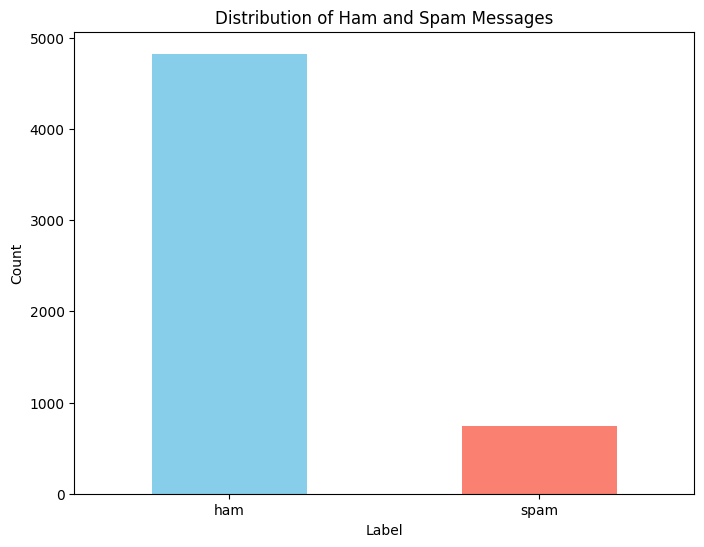

In [3]:
import matplotlib.pyplot as plt

# Count the occurrences of each label (ham and spam)
label_counts = data['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Exploratory Data Analysis

### Check for Missing Values

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
label    0
text     0
dtype: int64


### Basic Statistics (Text Length)

In [5]:
# Add a column for message length
data['text_length'] = data['text'].apply(len)

# Show basic statistics for text length
print("\nBasic statistics for text length:")
print(data['text_length'].describe())


Basic statistics for text length:
count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: text_length, dtype: float64


### Visualize Text Length Distribution

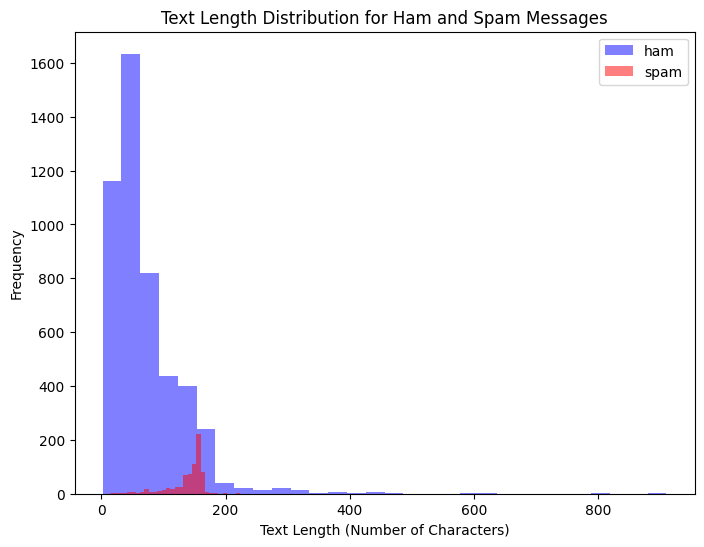

In [6]:
# Plot the distribution of text lengths for ham and spam
plt.figure(figsize=(8, 6))
data[data['label'] == 'ham']['text_length'].plot(kind='hist', alpha=0.5, label='ham', bins=30, color='blue')
data[data['label'] == 'spam']['text_length'].plot(kind='hist', alpha=0.5, label='spam', bins=30, color='red')
plt.title('Text Length Distribution for Ham and Spam Messages')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Check Duplication

In [7]:
# Check for duplicates
duplicates = data[data.duplicated(subset=['text'])]
print(f"\nNumber of duplicate messages: {duplicates.shape[0]}")


Number of duplicate messages: 403


In [8]:
# Keep only the first occurrence of each message
data_unique = data.drop_duplicates(subset=['text'], keep='first')

# Verify the new dataset size
print(f"Original dataset size: {data.shape[0]}")
print(f"Dataset size after keeping only the first occurrence: {data_unique.shape[0]}")

Original dataset size: 5572
Dataset size after keeping only the first occurrence: 5169


### Top 10 Most Common Words in Spam vs. Ham

In [9]:
from collections import Counter
import re

# Function to clean text (removing non-alphabetic characters)
def clean_text(text):
    return ' '.join(re.findall(r'\b\w+\b', text.lower()))

# Get top 10 words in ham and spam messages
ham_cleaned = ' '.join(data_unique[data_unique['label'] == 'ham']['text'].apply(clean_text))
spam_cleaned = ' '.join(data_unique[data_unique['label'] == 'spam']['text'].apply(clean_text))

ham_word_count = Counter(ham_cleaned.split())
spam_word_count = Counter(spam_cleaned.split())

# Get top 10 most common words
ham_top_10 = ham_word_count.most_common(10)
spam_top_10 = spam_word_count.most_common(10)

print("\nTop 10 words in Ham messages:")
print(ham_top_10)
print("\nTop 10 words in Spam messages:")
print(spam_top_10)


Top 10 words in Ham messages:
[('i', 2793), ('you', 1880), ('to', 1481), ('the', 1062), ('a', 975), ('u', 930), ('and', 826), ('in', 762), ('me', 732), ('my', 679)]

Top 10 words in Spam messages:
[('to', 599), ('a', 335), ('call', 309), ('you', 268), ('your', 242), ('free', 195), ('2', 185), ('for', 185), ('the', 183), ('now', 164)]


### Word Cloud

In [10]:
html_text = "<div>Hello, <b>world!</b></div>"
clean_text = re.sub(r'<[^>]+>', '', html_text)  # Removes anything within <>

print(clean_text)


Hello, world!


In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(data):
    text = ""
    pattern1 = '&lt;'
    pattern2 = '#&gt;'
    for i in range(len(data)):
        temp_text = data.loc[i, 'text'].lower()
        clean_text = re.sub(pattern1, '', temp_text)
        clean_text = re.sub(pattern2, '', clean_text)
        text += clean_text
    # Add any additional stopwords if necessary
    stopwords = set(STOPWORDS)
    # stopwords = set()
    # stopwords.update(["additional", "stopword"])

    # Create the word cloud object
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


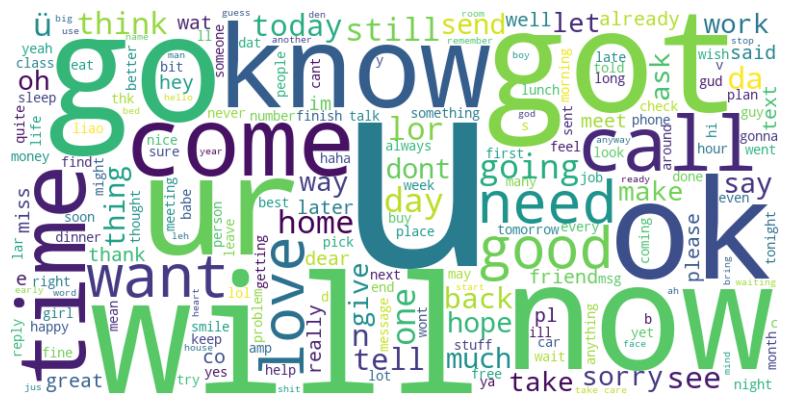

In [12]:
generate_word_cloud(data_unique[data_unique['label'] == 'ham'].reset_index(drop=True))

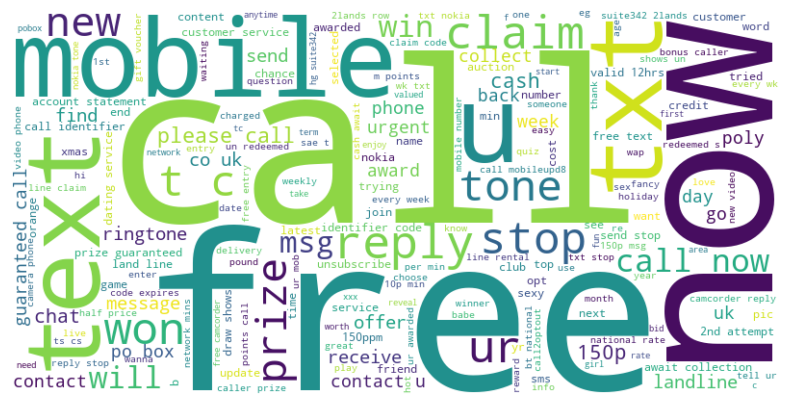

In [13]:
generate_word_cloud(data_unique[data_unique['label'] == 'spam'].reset_index(drop=True))

### Check Data Imbalance

In [14]:
# Check for class imbalance
class_distribution = data_unique['label'].value_counts(normalize=True)
print("\nClass distribution (ham vs. spam):")
print(class_distribution)


Class distribution (ham vs. spam):
ham     0.87367
spam    0.12633
Name: label, dtype: float64


# Preprocess Data

In [33]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 2.4 MB/s            
  Using cached click-8.1.7-py3-none-any.whl (97 kB)


In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (you only need to run this once)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ifengwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Initialize the stemmer and stopwords list
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize the text
    words = text.split()
    
    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # 5. Apply stemming
    words = [stemmer.stem(word) for word in words]
    
    # Join words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
data_unique['text_cleaned'] = data_unique['text'].apply(preprocess_text)

# Display the first few rows of the cleaned text
data_unique[['text', 'text_cleaned']].head()

/var/folders/nl/hvb2wh_x56xfglf7ds9c47tc0000gn/T/ipykernel_41158/4281301136.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['text_cleaned'] = data_unique['text'].apply(preprocess_text)


,text,text_cleaned
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


### Apply TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,          # Limit the vocabulary size
    ngram_range=(1, 3),          # Use unigrams and bigrams
    min_df=2,                    # Exclude terms that appear in fewer than 2 documents
    max_df=0.90                   # Exclude terms that appear in more than 90% of documents
)

# Transform the cleaned text into TF-IDF features
X = vectorizer.fit_transform(data_unique['text_cleaned'])

# Convert the result into a DataFrame to inspect
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF matrix
print(X_df.head())

   aah  abi  abiola  abl  abl get  abt  abta  abta complimentari   ac  acc  \
0  0.0  0.0     0.0  0.0      0.0  0.0   0.0                 0.0  0.0  0.0   
1  0.0  0.0     0.0  0.0      0.0  0.0   0.0                 0.0  0.0  0.0   
2  0.0  0.0     0.0  0.0      0.0  0.0   0.0                 0.0  0.0  0.0   
3  0.0  0.0     0.0  0.0      0.0  0.0   0.0                 0.0  0.0  0.0   
4  0.0  0.0     0.0  0.0      0.0  0.0   0.0                 0.0  0.0  0.0   

   ...  yr prize call  yummi  yun  yup  yup im  yup ok  yup thk  zed  \
0  ...            0.0    0.0  0.0  0.0     0.0     0.0      0.0  0.0   
1  ...            0.0    0.0  0.0  0.0     0.0     0.0      0.0  0.0   
2  ...            0.0    0.0  0.0  0.0     0.0     0.0      0.0  0.0   
3  ...            0.0    0.0  0.0  0.0     0.0     0.0      0.0  0.0   
4  ...            0.0    0.0  0.0  0.0     0.0     0.0      0.0  0.0   

   zed profit  zed profit chariti  
0         0.0                 0.0  
1         0.0             

### Prepare the Target Labels

In [18]:
# Assign the target variable (label)
y = data_unique['label']

# Display the first few target values
print(y.head())


0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object


### Split the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# First split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Display the shapes of the datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3721
Validation set size: 414
Test set size: 1034


# Train the Model

In [40]:
from sklearn.svm import SVC
def cm_plot(y_test, y_pred, reg='l1'):
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)
    acc = (TP + TN) / (TP + TN + FP + FN)
    # print(f"Logistic Regression Model {reg} (KNN Imputer) F1 score: {round(f1*100, 2)} %")
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plotting the confusion matrix
    # disp.plot(cmap=plt.cm.Blues)
    # plt.title(f"Logistic Regression {reg} (KNN Imputer)")
    # plt.show()
    return f1, acc

def cross_validation(x, y, t=10):
    accuracy_list_l1, fscore_list_l1 = [], []
    accuracy_list_l2, fscore_list_l2 = [], []
    accuracy_list_l3, fscore_list_l3 = [], []
    accuracy_list_l4, fscore_list_l4 = [], []
    for i in range(t, t+10):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        
        # Create a Logistic Regression model
        # Step 2: Train Logistic Regression with L1 (Lasso) regularization
        model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
        model_l1.fit(X_train, y_train)
        
        # Step 3: Train Logistic Regression with L2 (Ridge) regularization
        model_l2 = MultinomialNB(alpha=0.1)
        model_l2.fit(X_train, y_train)
        
        model_l3 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200)
        model_l3.fit(X_train, y_train)
        
        model_l4 = SVC(C=10, gamma='scale', kernel='rbf', max_iter=300)
        model_l4.fit(X_train, y_train)
        

        y_pred_l1 = model_l1.predict(X_test)
        y_pred_l2 = model_l2.predict(X_test)
        y_pred_l3 = model_l3.predict(X_test)
        y_pred_l4 = model_l4.predict(X_test)
        
        f1_l1, accuracy_l1 = cm_plot(y_test, y_pred_l1)
        f1_l2, accuracy_l2 = cm_plot(y_test, y_pred_l2)
        f1_l3, accuracy_l3 = cm_plot(y_test, y_pred_l3)
        f1_l4, accuracy_l4 = cm_plot(y_test, y_pred_l4)
        fscore_list_l1.append(f1_l1)
        fscore_list_l2.append(f1_l2)
        fscore_list_l3.append(f1_l3)
        fscore_list_l4.append(f1_l4)
        accuracy_list_l1.append(accuracy_l1)
        accuracy_list_l2.append(accuracy_l2)
        accuracy_list_l3.append(accuracy_l3)
        accuracy_list_l4.append(accuracy_l4)

    return accuracy_list_l1, fscore_list_l1, accuracy_list_l2, fscore_list_l2, accuracy_list_l3, fscore_list_l3, accuracy_list_l4, fscore_list_l4

In [41]:
acc1, f1, acc2, f2, acc3, f3, acc4, f4 = cross_validation(X, y, t=10)

/opt/homebrew/Caskroom/miniforge/base/envs/ORIE/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ORIE/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ORIE/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ORIE/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

In [47]:
# Visualize Performance Across Folds

def plot_stability(acc, f, title):
    folds = np.arange(1, len(acc) + 1)

    plt.plot(folds, acc, label='Accuracy', marker='o')
    plt.plot(folds, f, label='F1 Score', marker='s')
    plt.axhline(y=np.mean(acc), color='blue', linestyle='--', label='Mean Accuracy')
    plt.axhline(y=np.mean(f), color='green', linestyle='--', label='Mean F1 Score')

    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title(f'Model Stability Across Folds -- {title}')
    plt.ylim(0.5, 1)
    plt.legend()
    plt.show()

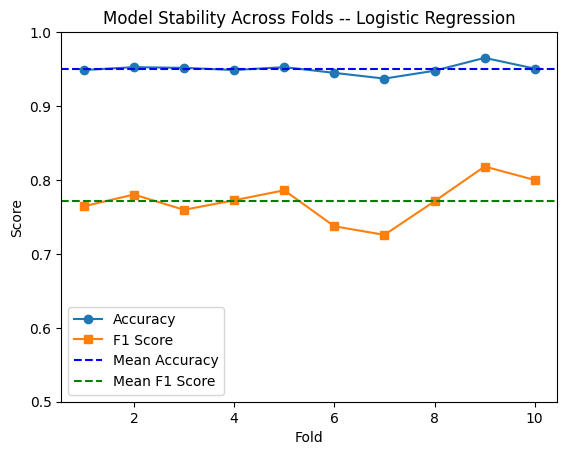

In [48]:
plot_stability(acc1, f1, "Logistic Regression")

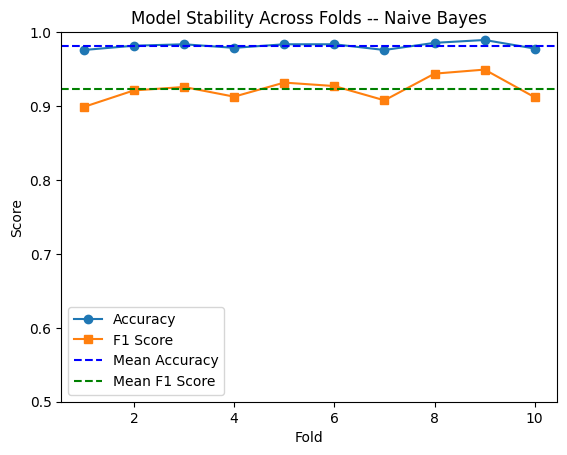

In [49]:
plot_stability(acc2, f2, "Naive Bayes")

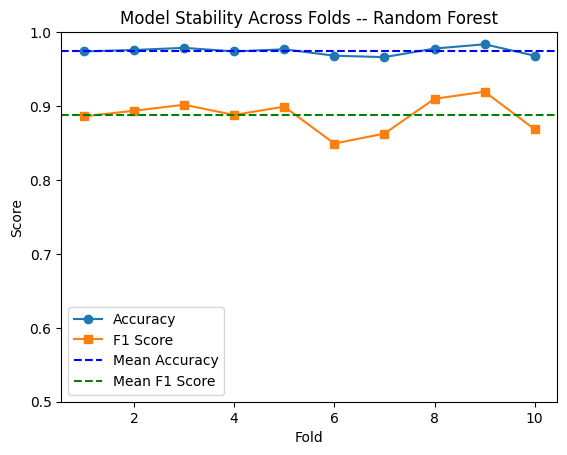

In [50]:
plot_stability(acc3, f3, "Random Forest")

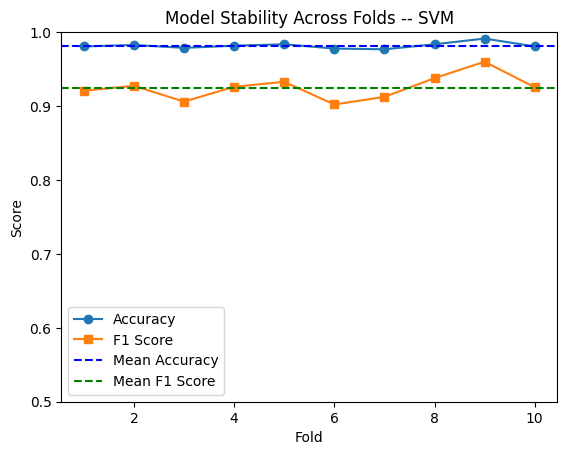

In [51]:
plot_stability(acc4, f4, "SVM")

### Naive Bayes Model

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9589

Classification Report (Validation Set):
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       354
        spam       1.00      0.72      0.83        60

    accuracy                           0.96       414
   macro avg       0.98      0.86      0.91       414
weighted avg       0.96      0.96      0.96       414



In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize GridSearchCV with Naive Bayes
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best alpha: {grid_search.best_params_}")

# Use the best model found by GridSearchCV
best_nb_model = grid_search.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_tuned = best_nb_model.predict(X_val)
val_accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)
print(f"Tuned Validation Accuracy: {val_accuracy_tuned:.4f}")

Best alpha: {'alpha': 0.1}
Tuned Validation Accuracy: 0.9710


In [24]:
# Make predictions on the test set
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9700

Classification Report (Test Set):
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       894
        spam       1.00      0.78      0.88       140

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



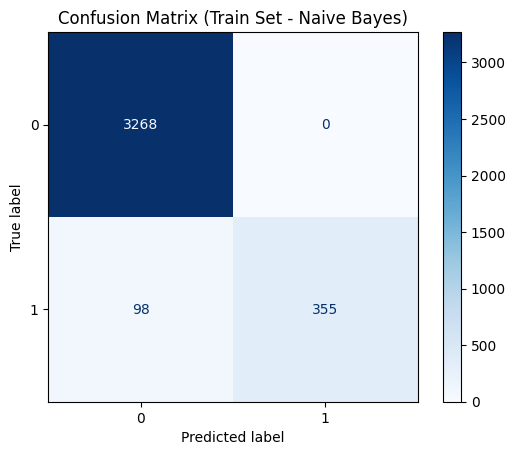

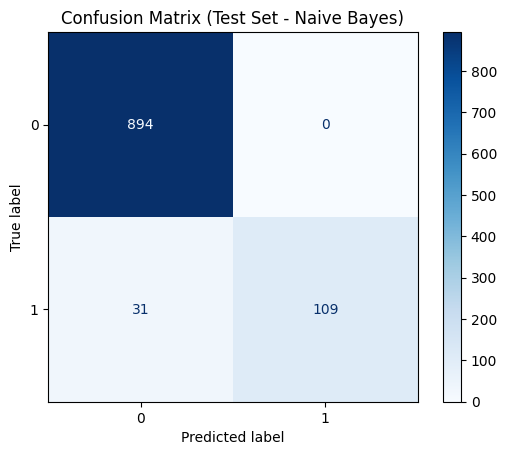

In [26]:
# Generate confusion matrix for the training set
y_train_pred = nb_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

# Generate confusion matrix for the test set
y_test_pred = nb_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plotting the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_train, "Confusion Matrix (Train Set - Naive Bayes)")
plot_confusion_matrix(cm_test, "Confusion Matrix (Test Set - Naive Bayes)")

### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy (Random Forest): {val_accuracy_rf:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set - Random Forest):")
print(classification_report(y_val, y_val_pred_rf))

Validation Accuracy (Random Forest): 0.9589

Classification Report (Validation Set - Random Forest):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       354
        spam       0.98      0.73      0.84        60

    accuracy                           0.96       414
   macro avg       0.97      0.87      0.91       414
weighted avg       0.96      0.96      0.96       414



In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best parameters (Random Forest): {grid_search_rf.best_params_}")

# Use the best model found by GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)
val_accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
print(f"Tuned Validation Accuracy (Random Forest): {val_accuracy_rf_tuned:.4f}")

Best parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Validation Accuracy (Random Forest): 0.9589


In [30]:
# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set - Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

Test Accuracy (Random Forest): 0.9720

Classification Report (Test Set - Random Forest):
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       894
        spam       1.00      0.79      0.88       140

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



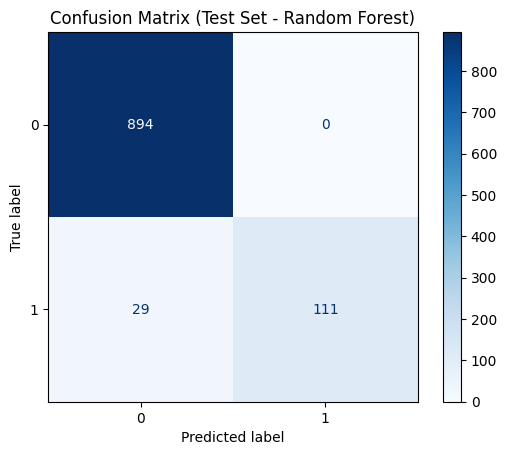

In [31]:
# Generate confusion matrix for the test set
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Plot confusion matrix for Random Forest
plot_confusion_matrix(cm_test_rf, "Confusion Matrix (Test Set - Random Forest)")

# Logsitic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
print(f"Validation Accuracy (Logistic Regression): {val_accuracy_log_reg:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set - Logistic Regression):")
print(classification_report(y_val, y_val_pred_log_reg))

Validation Accuracy (Logistic Regression): 0.9324

Classification Report (Validation Set - Logistic Regression):
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       354
        spam       1.00      0.53      0.70        60

    accuracy                           0.93       414
   macro avg       0.96      0.77      0.83       414
weighted avg       0.94      0.93      0.92       414



In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV with Logistic Regression
grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_log_reg.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best parameters (Logistic Regression): {grid_search_log_reg.best_params_}")

# Use the best model found by GridSearchCV
best_log_reg_model = grid_search_log_reg.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_log_reg_tuned = best_log_reg_model.predict(X_val)
val_accuracy_log_reg_tuned = accuracy_score(y_val, y_val_pred_log_reg_tuned)
print(f"Tuned Validation Accuracy (Logistic Regression): {val_accuracy_log_reg_tuned:.4f}")

Best parameters (Logistic Regression): {'C': 10, 'solver': 'liblinear'}
Tuned Validation Accuracy (Logistic Regression): 0.9734


In [29]:
# Make predictions on the test set
y_test_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log_reg:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set - Logistic Regression):")
print(classification_report(y_test, y_test_pred_log_reg))

Test Accuracy (Logistic Regression): 0.9362

Classification Report (Test Set - Logistic Regression):
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       894
        spam       0.97      0.54      0.70       140

    accuracy                           0.94      1034
   macro avg       0.95      0.77      0.83      1034
weighted avg       0.94      0.94      0.93      1034



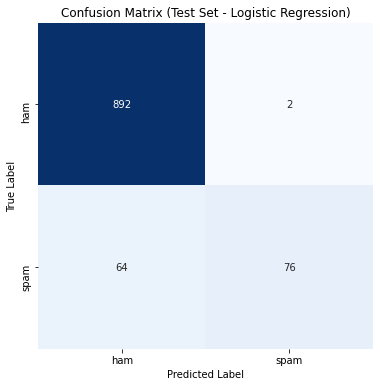

In [30]:
# Generate confusion matrix for the test set
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(cm_test_log_reg, "Confusion Matrix (Test Set - Logistic Regression)")

# SVM

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],                   # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto'],          # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4],                    # Degree of the polynomial kernel (only for 'poly')
    'max_iter': [300, 500]               # Number of iterations
}

# Initialize GridSearchCV with SVC (Support Vector Classifier)
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_svm.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print(f"Best parameters (SVM): {grid_search_svm.best_params_}")

# Use the best model found by GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the tuned model on the validation set
y_val_pred_svm = best_svm_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Tuned Validation Accuracy (SVM): {val_accuracy_svm:.4f}")

# Display the classification report
print("\nClassification Report (Validation Set - Tuned SVM):")
print(classification_report(y_val, y_val_pred_svm))

# Make predictions on the test set
y_test_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Tuned Test Accuracy (SVM): {test_accuracy_svm:.4f}")

# Display the classification report for the test set
print("\nClassification Report (Test Set - Tuned SVM):")
print(classification_report(y_test, y_test_pred_svm))

# Generate confusion matrix for the test set
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)


/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py

Best parameters (SVM): {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 300}
Tuned Validation Accuracy (SVM): 0.9758

Classification Report (Validation Set - Tuned SVM):
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       354
        spam       0.98      0.85      0.91        60

    accuracy                           0.98       414
   macro avg       0.98      0.92      0.95       414
weighted avg       0.98      0.98      0.98       414

Tuned Test Accuracy (SVM): 0.9768

Classification Report (Test Set - Tuned SVM):
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       894
        spam       0.96      0.86      0.91       140

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



/Users/hanfei/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


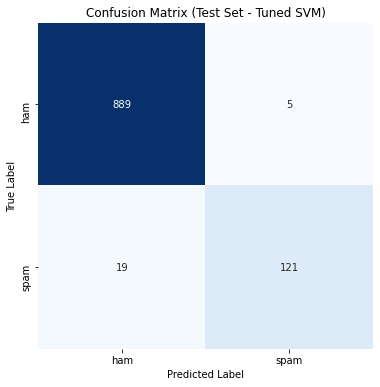

In [32]:
# Plot confusion matrix for SVM
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for the test set
plot_confusion_matrix(cm_test_svm, "Confusion Matrix (Test Set - Tuned SVM)")